# **Simple Linear Regression**

This notebook is to investigate the nuts and bolts of simple linear regression.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import math, copy

warnings.filterwarnings("ignore")

## **Generating Data**

- The following code generates synthetic training data for a simple linear regression model, where the relationship between the feature (x_train) and the target (y_train) is linear with added random noise.
- This type of dataset is often used to experiment with and demonstrate linear regression modeling techniques.

- Since this is synthetic data we know the optimal weights are `w = 2.5` and `b = 5.0` which we expect our model to find.


In [3]:
# Generating feature x
np.random.seed(42)
x_train = np.random.rand(100, 1) * 10  # 100 data points, values between 0 and 10, contains only 1 feature

# Creating target y which is not included in the x_train
slope = 2.5
intercept = 5.0
noise = np.random.randn(100, 1) * 2  # Adding random noise
y_train = slope * x_train + intercept + noise


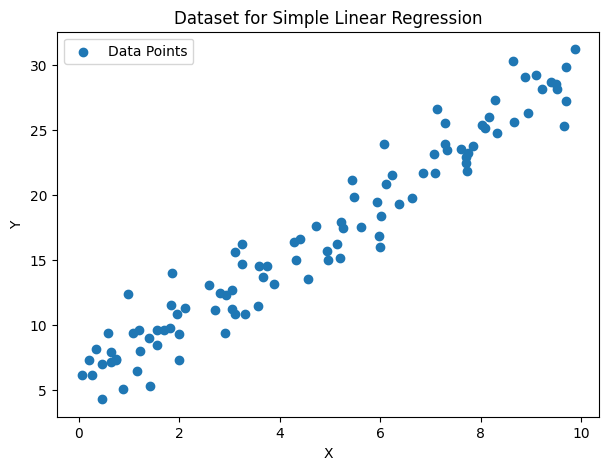

In [4]:
# Visualize the dataset
plt.figure(figsize=(7, 5))
plt.scatter(x_train, y_train, label='Data Points')
plt.title('Dataset for Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [5]:
# Checking number of Observations
m = x_train.shape[0]
print(f"Number of training examples is: {m}\n")

i = 0

x_i = x_train[i]
y_i = y_train[i]
print(f"(x({i}), y({i})) = ({x_i}, {y_i})")

Number of training examples is: 100

(x(0), y(0)) = ([3.74540119], [14.53759711])


## **SLR Model**

The model will generate the predicted values. Mathematical Formula of _straight line_ as this is SLR:<br>

$$f_{w,b}(x) = wx + b$$

Different values of $(w, b)$ give different functions $f(x)$ give different lines

- It is the <font color="#fac08f">optimal weights</font> ($w, b$) that the algorithm is trying to compute such that $\hat{y}$ is equal or close to $y^{(i)}$ for all ($x^{(i)}, y^{(i)})$

- In order to find this line we need a measure of fit and a systematic approach that has the lowest measure.


In [6]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      y (ndarray (m,)): target values
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

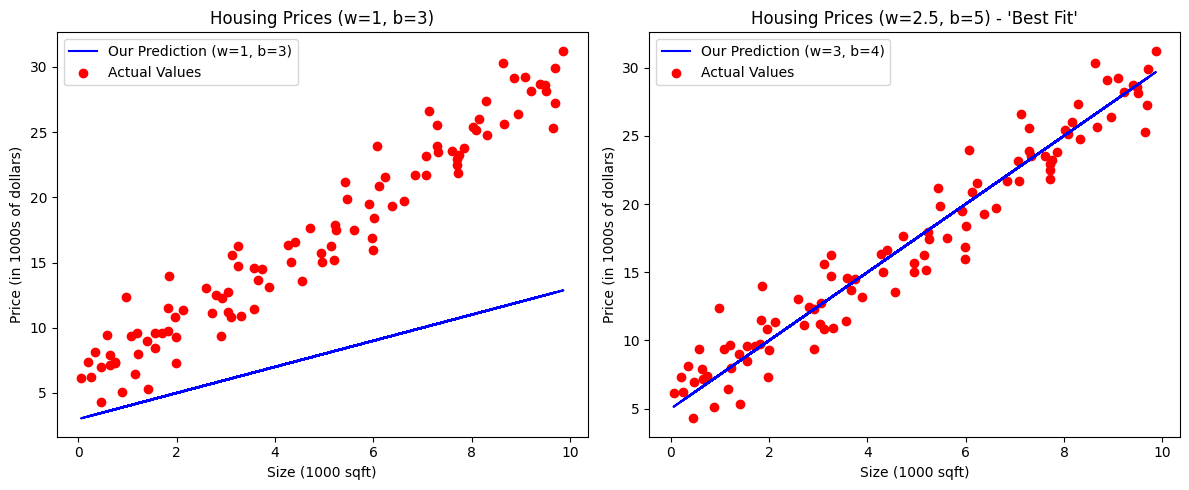

In [14]:
# Compute model output for the first set of parameters (w=1, b=3)
tmp_f_wb_1 = compute_model_output(x_train, 1, 3)

# Compute model output for the second set of parameters (w=3, b=4)
tmp_f_wb_2 = compute_model_output(x_train, 2.5, 5)

# Create a subplot with two plots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot for the first set of parameters
axs[0].plot(x_train, tmp_f_wb_1, c='b', label='Our Prediction (w=1, b=3)')
axs[0].scatter(x_train, y_train, c='r', label='Actual Values')
axs[0].set_title("Housing Prices (w=1, b=3)")
axs[0].set_ylabel('Price (in 1000s of dollars)')
axs[0].set_xlabel('Size (1000 sqft)')
axs[0].legend()

# Plot for the second set of parameters
axs[1].plot(x_train, tmp_f_wb_2, c='b', label='Our Prediction (w=3, b=4)')
axs[1].scatter(x_train, y_train, c='r', label='Actual Values')
axs[1].set_title("Housing Prices (w=2.5, b=5) - 'Best Fit'")
axs[1].set_ylabel('Price (in 1000s of dollars)')
axs[1].set_xlabel('Size (1000 sqft)')
axs[1].legend()

plt.tight_layout()
plt.show()

In the above case, the $w, b$ parameters are selected randomly instead of using a systematic approach to finding the best fit line as shown in the second plot above.


## **Cost Function**

In order to find the best fit line it is essential to introduce a <font color="#fac08f">measuring system to evaluate 'fitness'</font>, this is done using the **Cost Function**

Mathematical Formula for Cost $J(w,b)$ with one variable:

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$
where,

$$f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction. This term is also called `Error`
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.


In [8]:
#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

## **Gradient Descent**

Now that we have a system to measure fitness, how do we systematically find values of $w, b$ such that it has the lowest cost

Gradient Descent and its variants can be used to minimise the Cost Function. Interestingly GD can be used to minimise not just the cost function but any function in general.

<font color="#fac08f">Basic Operation flow of GD:</font>

1. Start with initial values of parameters ($w, b$ in this case)
2. Keep changing values of parameters to reduce $J(w, b$) i.e. Cost
3. Continue till reaching minimum (The lowest possible Cost value)

It is possible for the function to have more than one minimum called <font color="#fac08f">local minima</font>, but there is only one <font color="#fac08f">global minima</font>.

Gradient Descent can be expressed mathematically as follows:

$$
\begin{align*} \text{repeat}&\text{ until convergence:} \; \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w}  \; \newline
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline
\end{align*}
$$

where, parameters $w$, $b$ are updated simultaneously.

- $\alpha$ is the learning rate
- The "`=`" signifies the assignment operator "`==`"and <font color="#fac08f">not truth assertion</font>. These parameters should be updated simultaneously
- The derivative term $\frac{\partial J(w,b)}{\partial w}$ is calculating the <font color="#fac08f">slope</font> of the point where the initial gradient descent is initialised
  <br><br>

The gradient is defined as after simplifying as follows:

$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \\
\frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \\
\end{align}
$$

Here _simultaniously_ means that you calculate the partial derivatives for all the parameters before updating any of the parameters.


In [9]:
def compute_gradient(x, y, w, b): # Computes derivative term

    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db  

In [10]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    
    w = copy.deepcopy(w_in) # avoid modifying global w_in
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1][0]:0.2e} ",
                f"dj_dw: {dj_dw[0]: 0.3e}, dj_db: {dj_db[0]: 0.3e}  ",
                f"w: {w[0]: 0.3e}, b:{b[0]: 0.5e}")

 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [11]:
# Initialize parameters
w_init = 0
b_init = 0

# Some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2

# Run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)

print("\nOriginal w, b values used to generate values: 2.5, 5")
print(f"\nPredicted (w,b) found by gradient descent: ({w_final},{b_final})")

Iteration    0: Cost 8.10e+01  dj_dw: -9.986e+01, dj_db: -1.675e+01   w:  9.986e-01, b: 1.67524e-01


Iteration 1000: Cost 1.63e+00  dj_dw:  1.311e-02, dj_db: -8.529e-02   w:  2.455e+00, b: 5.12353e+00
Iteration 2000: Cost 1.61e+00  dj_dw:  8.155e-04, dj_db: -5.306e-03   w:  2.411e+00, b: 5.41111e+00
Iteration 3000: Cost 1.61e+00  dj_dw:  5.073e-05, dj_db: -3.301e-04   w:  2.408e+00, b: 5.42901e+00
Iteration 4000: Cost 1.61e+00  dj_dw:  3.156e-06, dj_db: -2.053e-05   w:  2.408e+00, b: 5.43012e+00
Iteration 5000: Cost 1.61e+00  dj_dw:  1.963e-07, dj_db: -1.277e-06   w:  2.408e+00, b: 5.43019e+00
Iteration 6000: Cost 1.61e+00  dj_dw:  1.221e-08, dj_db: -7.946e-08   w:  2.408e+00, b: 5.43019e+00
Iteration 7000: Cost 1.61e+00  dj_dw:  7.598e-10, dj_db: -4.943e-09   w:  2.408e+00, b: 5.43019e+00
Iteration 8000: Cost 1.61e+00  dj_dw:  4.727e-11, dj_db: -3.075e-10   w:  2.408e+00, b: 5.43019e+00
Iteration 9000: Cost 1.61e+00  dj_dw:  2.942e-12, dj_db: -1.913e-11   w:  2.408e+00, b: 5.43019e+00

Original w, b values used to generate values: 2.5, 5

Predicted (w,b) found by gradient descent: ([

## **Learning Rate**

Depending on the learning rate the model can identify the convergence effectively or poorly. Having a very large learning rate tends the model to overshoot the global/local minimum. Thus selecting a reasonable learning rate is essential for optimal performance.

Deciding a good learning rate depends largely on the data but a good method would be to plot the learning curves for different learning rates for small number of iterations to see which rate performs well.

A <font color="#fac08f">learning curve</font> is plotted by Number of Iterations vs Cost Function.


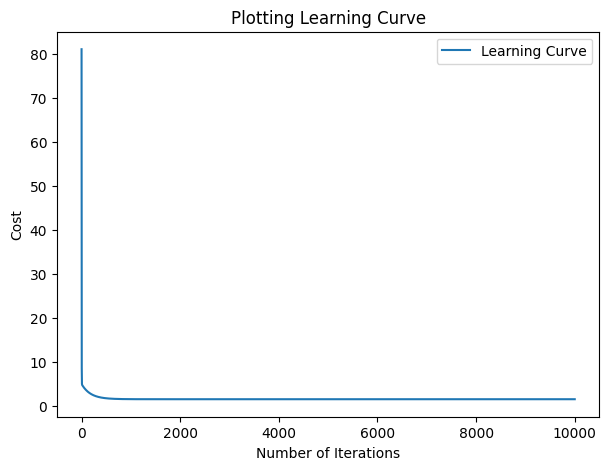

In [12]:
# Visualize the dataset
iter = np.arange(1, 10001)

plt.figure(figsize=(7, 5))
plt.plot(iter, J_hist, label='Learning Curve')
plt.title('Plotting Learning Curve')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()
